## Name = Akash Dipak Aaglawe

## Task_1 = Bank Customer Churn Prediction

## The task is to train a machine learning model to predict whether a bank customer will churn (leave the bank) or not based on various customer attributes and banking behavior. The goal is to create a model that can accurately identify customers who are likely to churn, enabling proactive retention strategies.

# import required python library

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

#read dataset

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

#eda

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.drop(df.columns[[0,1,2,9]],axis=1,inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,1,0,113931.57,1
3,699,France,Female,39,1,0.00,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [11]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,0,38190.78,0


In [12]:
df.shape

(10000, 10)

In [13]:
df= df.copy(deep=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


#data visualization

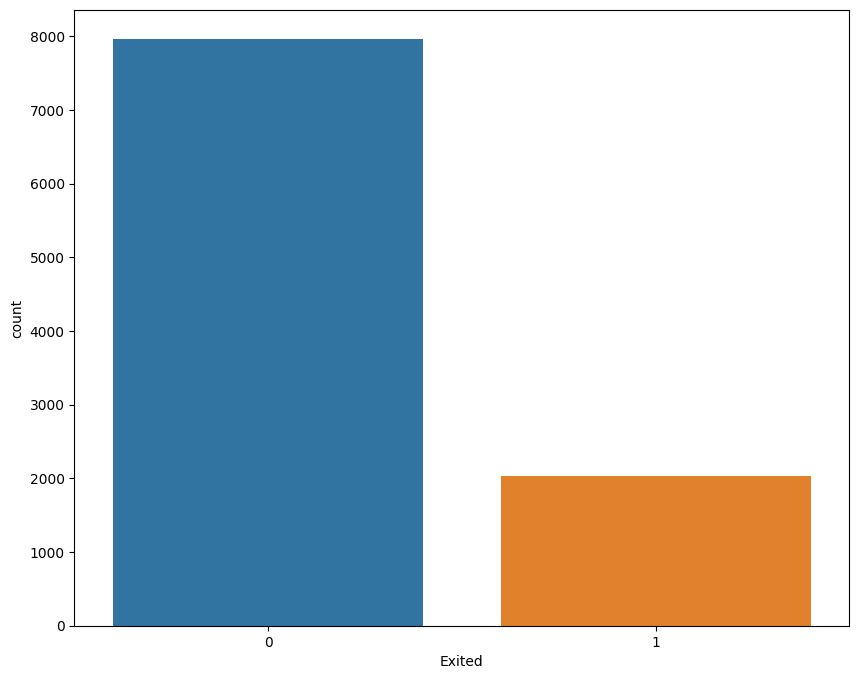

In [15]:
plt.figure(figsize=(10,8))
sn.countplot(x='Exited',data=df)
plt.show()

In [16]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
d=dict(df.groupby('Geography')['Geography'].count())

In [18]:
d

{'France': 5014, 'Germany': 2509, 'Spain': 2477}

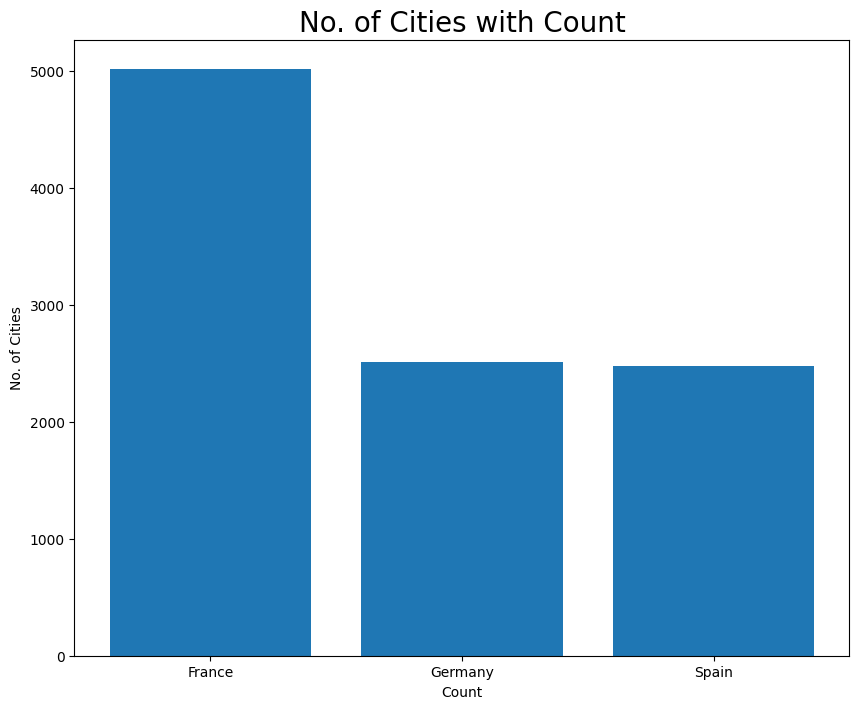

In [19]:
plt.figure(figsize=(10,8))
plt.bar(d.keys(),d.values())
plt.title('No. of Cities with Count',size=20)
plt.xlabel('Count',size=10)
plt.ylabel('No. of Cities',size=10)
plt.show()

In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [22]:
df['Age'] = pd.cut(df['Age'], bins=[0,11,21,31,41,51,61,71,81,91,100] , labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])

#pd.cut(DF['Age'], bins=[0,11,21,31,41,51,61,71,100],labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-100'])

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,41-50,2,0.00,1,1,101348.88,1
1,608,Spain,Female,31-40,1,83807.86,0,1,112542.58,0
2,502,France,Female,41-50,8,159660.80,1,0,113931.57,1
3,699,France,Female,31-40,1,0.00,0,0,93826.63,0
4,850,Spain,Female,41-50,2,125510.82,1,1,79084.10,0


In [24]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

df['Geography'] = df['Geography'].map({'France':0, 'Germany':1, 'Spain':2})

df['Age'] = df['Age'].map({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6, '61-70':7, '71-80':8, '81-90':9, '91-100':10})

In [25]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,5,2,0.00,1,1,101348.88,1
1,608,2,0,4,1,83807.86,0,1,112542.58,0
2,502,0,0,5,8,159660.80,1,0,113931.57,1
3,699,0,0,4,1,0.00,0,0,93826.63,0
4,850,2,0,5,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,4,5,0.00,1,0,96270.64,0
9996,516,0,1,4,10,57369.61,1,1,101699.77,0
9997,709,0,0,4,7,0.00,0,1,42085.58,1
9998,772,1,1,5,3,75075.31,1,0,92888.52,1


#split data into train and test and apply MinMaxScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [27]:
x=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary']]

In [28]:
y=df['Exited']

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=54)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 9)
(3000, 9)
(7000,)
(3000,)


In [31]:
mn = MinMaxScaler()

x_train=mn.fit_transform(x_train)

x_test=mn.transform(x_test)


In [32]:
x_train

array([[0.64      , 0.        , 1.        , ..., 1.        , 1.        ,
        0.05708726],
       [0.836     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.34541493],
       [0.626     , 0.5       , 0.        , ..., 1.        , 1.        ,
        0.29128773],
       ...,
       [0.346     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.64358402],
       [0.52      , 1.        , 0.        , ..., 1.        , 1.        ,
        0.6478937 ],
       [0.272     , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.25681734]])

#apply deep learning model

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(10,kernel_initializer = 'he_uniform',activation='relu',input_dim=9))

model.add(Dense(40,kernel_initializer = 'he_uniform',activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(50,kernel_initializer = 'he_uniform',activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(6,kernel_initializer = 'he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [35]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
model_his = model.fit(x_train,y_train,validation_split=0.2,batch_size=20,epochs=100)

Epoch 1/100
280/280 [==============================] - 6s 12ms/step - loss: 0.5274 - accuracy: 0.7866 - val_loss: 0.4655 - val_accuracy: 0.7986
Epoch 2/100
280/280 [==============================] - 2s 5ms/step - loss: 0.4935 - accuracy: 0.7898 - val_loss: 0.4604 - val_accuracy: 0.7986
Epoch 3/100
280/280 [==============================] - 1s 4ms/step - loss: 0.4875 - accuracy: 0.7904 - val_loss: 0.4546 - val_accuracy: 0.7986
Epoch 4/100
280/280 [==============================] - 1s 4ms/step - loss: 0.4789 - accuracy: 0.7904 - val_loss: 0.4546 - val_accuracy: 0.7986
Epoch 5/100
280/280 [==============================] - 1s 5ms/step - loss: 0.4766 - accuracy: 0.7927 - val_loss: 0.4525 - val_accuracy: 0.7986
Epoch 6/100
280/280 [==============================] - 1s 5ms/step - loss: 0.4705 - accuracy: 0.7891 - val_loss: 0.4499 - val_accuracy: 0.8057
Epoch 7/100
280/280 [==============================] - 1s 5ms/step - loss: 0.4661 - accuracy: 0.7982 - val_loss: 0.4463 - val_accuracy: 0.816

In [37]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.7)
y_pred

94/94 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [38]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8286666666666667

#apply machine learning model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

In [41]:
print(accuracy_score(y_pred,y_test))

0.8203333333333334


#K_Nearest

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)


In [44]:
print(accuracy_score(y_pred,y_test))

0.8046666666666666


#GaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.8226666666666667
